In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
from FNO import FNO1d
from plot_utils import plot_data, plot_results, plot_loss, interactive_training_ui, interactive_sampling_plot
import torch.optim as optim
from train_utils import train_loop

## Loading Data

In [2]:
train_x = pd.read_csv('data/pulse_data/train_x.csv').to_numpy()
train_y = pd.read_csv('data/pulse_data/train_y.csv').to_numpy()
test_x = pd.read_csv('data/pulse_data/test_x.csv').to_numpy()
test_y = pd.read_csv('data/pulse_data/test_y.csv').to_numpy()
out_of_dist_x = pd.read_csv('data/pulse_data/outOfDist_x.csv').to_numpy()
out_of_dist_y = pd.read_csv('data/pulse_data/outOfDist_y.csv').to_numpy()

print("Shape train_x:", train_x.shape)
print("Shape train_y:", train_y.shape)
print("Shape test_x:", test_x.shape)
print("Shape test_y:", test_y.shape)

Shape train_x: (1000, 2001)
Shape train_y: (1000, 2001)
Shape test_x: (500, 2001)
Shape test_y: (500, 2001)


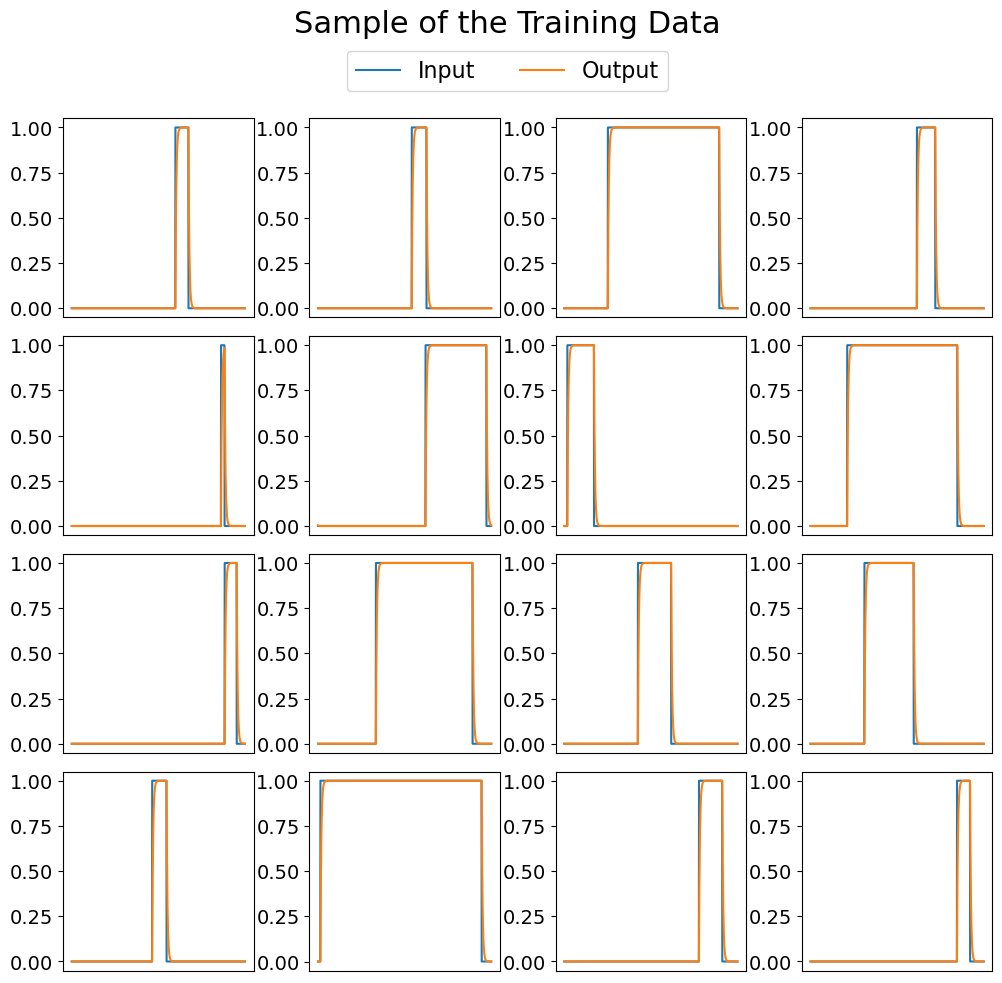

In [3]:
plot_data(train_x, train_y, name= "Sample of the Training Data")

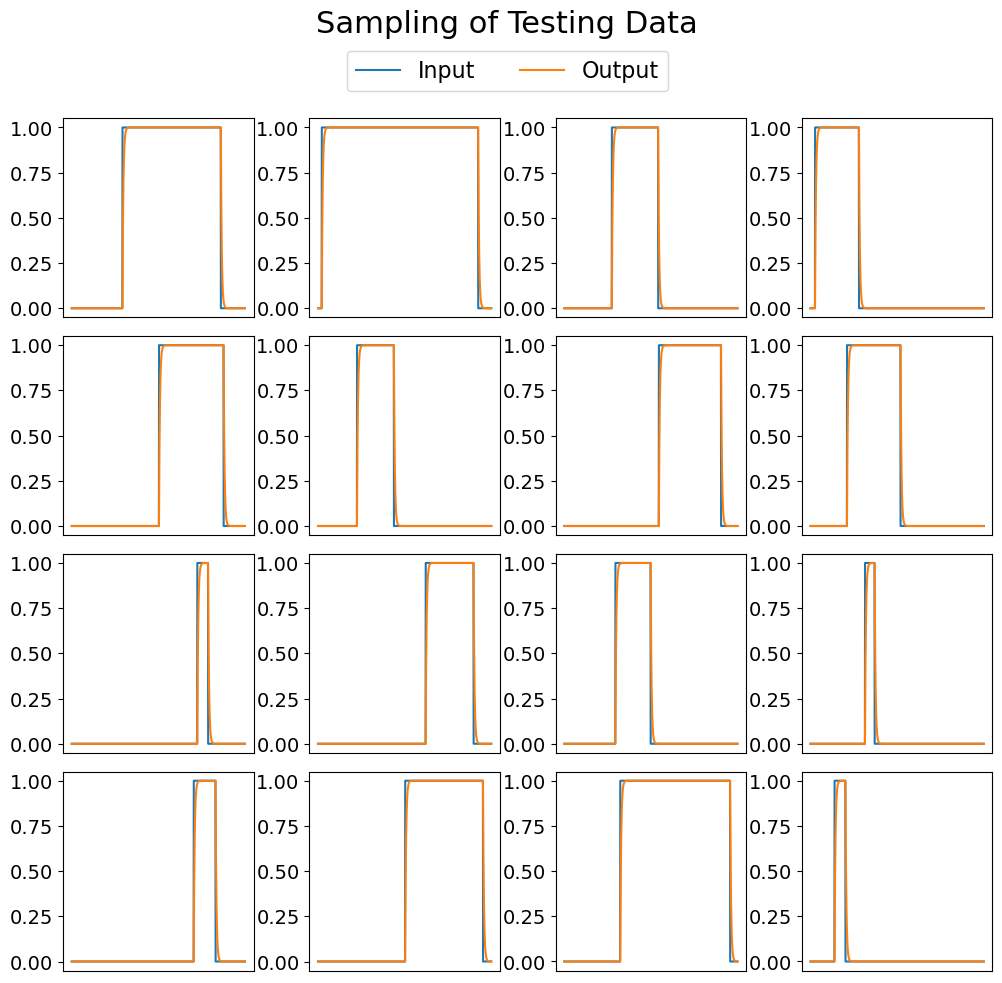

In [4]:
plot_data(test_x, test_y, name = "Sampling of Testing Data")

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_x = torch.Tensor(train_x[:,np.newaxis,:]).to(device)
train_y = torch.Tensor(train_y[:,np.newaxis,:]).to(device)
test_x = torch.Tensor(test_x[:,np.newaxis,:]).to(device)
test_y = torch.Tensor(test_y[:,np.newaxis,:]).to(device)

out_of_dist_x = torch.Tensor(out_of_dist_x[:,np.newaxis,:]).to(device)
out_of_dist_y = torch.Tensor(out_of_dist_y[:,np.newaxis,:]).to(device)
train_dataset = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


## Setting Up First Model

Let's use as a simple a FNO as we can, one with only a single block, and no lifting to a higher dimension

In [6]:
torch.manual_seed(0)
first_fno = FNO1d(in_channels = 1,
                  out_channels = 1,
                  modes = 32,
                  width = 8,
                  n_blocks = 1,
                  )

In [7]:
optimizer = optim.Adam(first_fno.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.95)

loss_history, val_loss_history = train_loop(model = first_fno,
                                            train_loader=train_loader,
                                            val_x = test_x,
                                            val_y = test_y,
                                            epochs = 20,
                                            optimizer= optimizer,
                                            scheduler = scheduler,
                                            verbose = True,
                                            sample_freq = 4)

EPOCH 0: train_loss: 1.473e-01 	 test_loss: 3.182e-02
EPOCH 1: train_loss: 1.685e-01 	 test_loss: 2.025e-02
EPOCH 2: train_loss: 1.274e-01 	 test_loss: 1.656e-02
EPOCH 3: train_loss: 9.895e-02 	 test_loss: 1.354e-02
EPOCH 4: train_loss: 8.524e-02 	 test_loss: 7.000e-03
EPOCH 5: train_loss: 7.848e-02 	 test_loss: 4.040e-03
EPOCH 6: train_loss: 8.176e-02 	 test_loss: 3.416e-03
EPOCH 7: train_loss: 7.802e-02 	 test_loss: 3.182e-03
EPOCH 8: train_loss: 7.891e-02 	 test_loss: 3.076e-03
EPOCH 9: train_loss: 7.873e-02 	 test_loss: 3.017e-03
EPOCH 10: train_loss: 8.128e-02 	 test_loss: 3.011e-03
EPOCH 11: train_loss: 8.045e-02 	 test_loss: 2.978e-03
EPOCH 12: train_loss: 8.153e-02 	 test_loss: 2.963e-03
EPOCH 13: train_loss: 7.988e-02 	 test_loss: 2.969e-03
EPOCH 14: train_loss: 7.859e-02 	 test_loss: 2.958e-03
EPOCH 15: train_loss: 7.848e-02 	 test_loss: 2.958e-03
EPOCH 16: train_loss: 8.048e-02 	 test_loss: 2.953e-03
EPOCH 17: train_loss: 7.936e-02 	 test_loss: 2.953e-03
EPOCH 18: train_loss

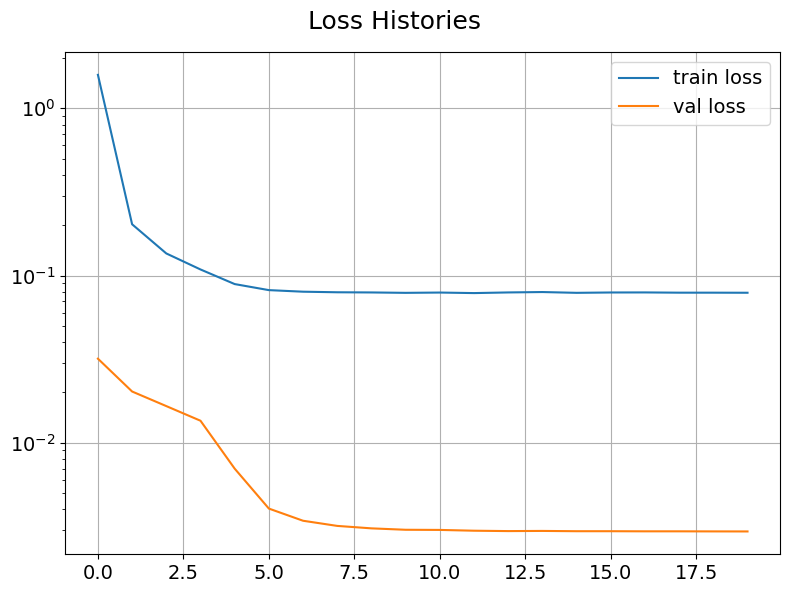

In [8]:
plot_loss(loss_history, val_loss_history, name = "Loss Histories");

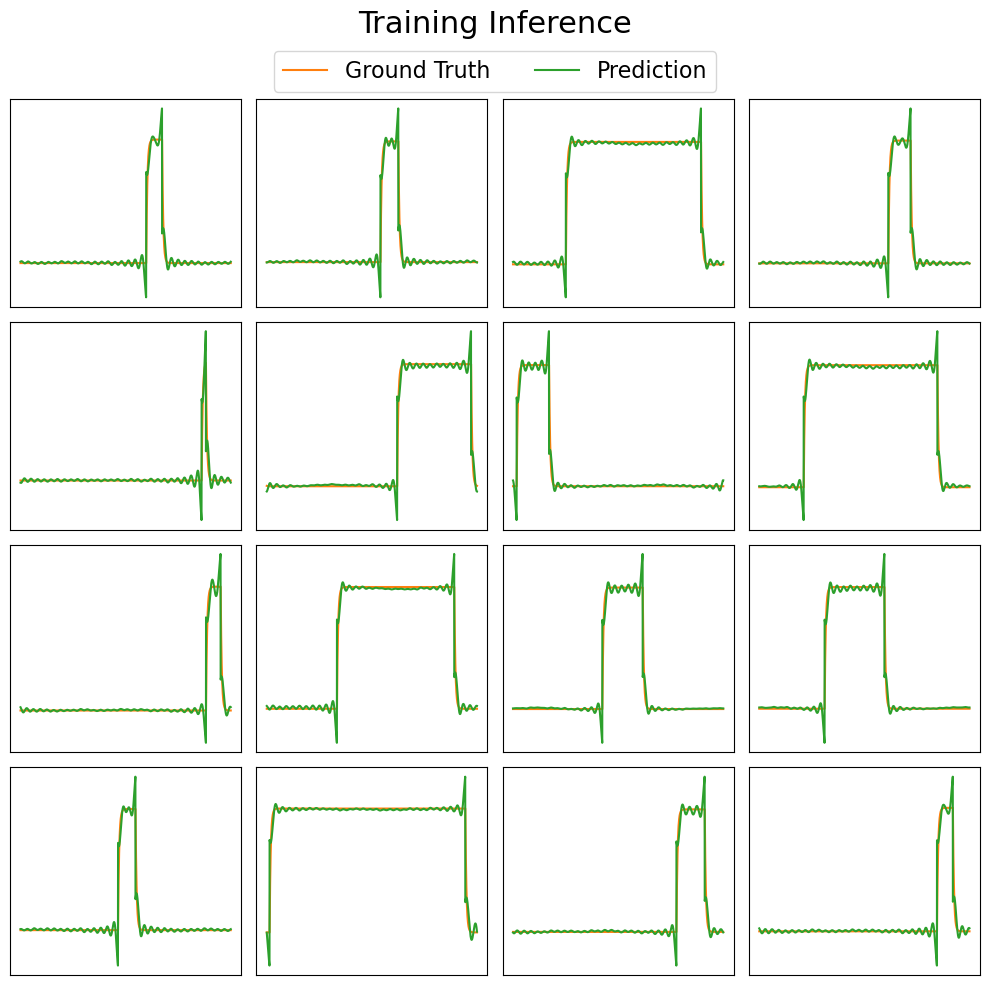

In [9]:
plot_results(first_fno, train_x, train_y, name = "Training Inference");

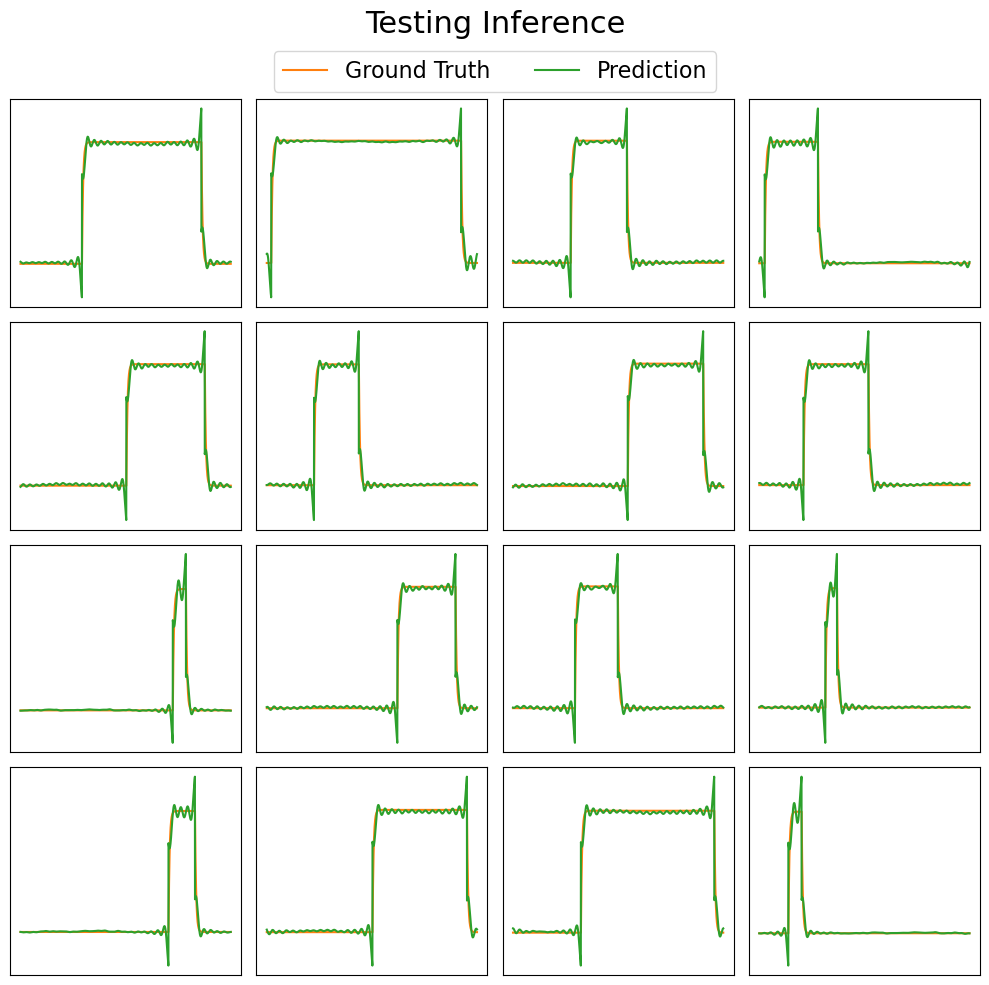

In [10]:
plot_results(first_fno, test_x, test_y, name = "Testing Inference");

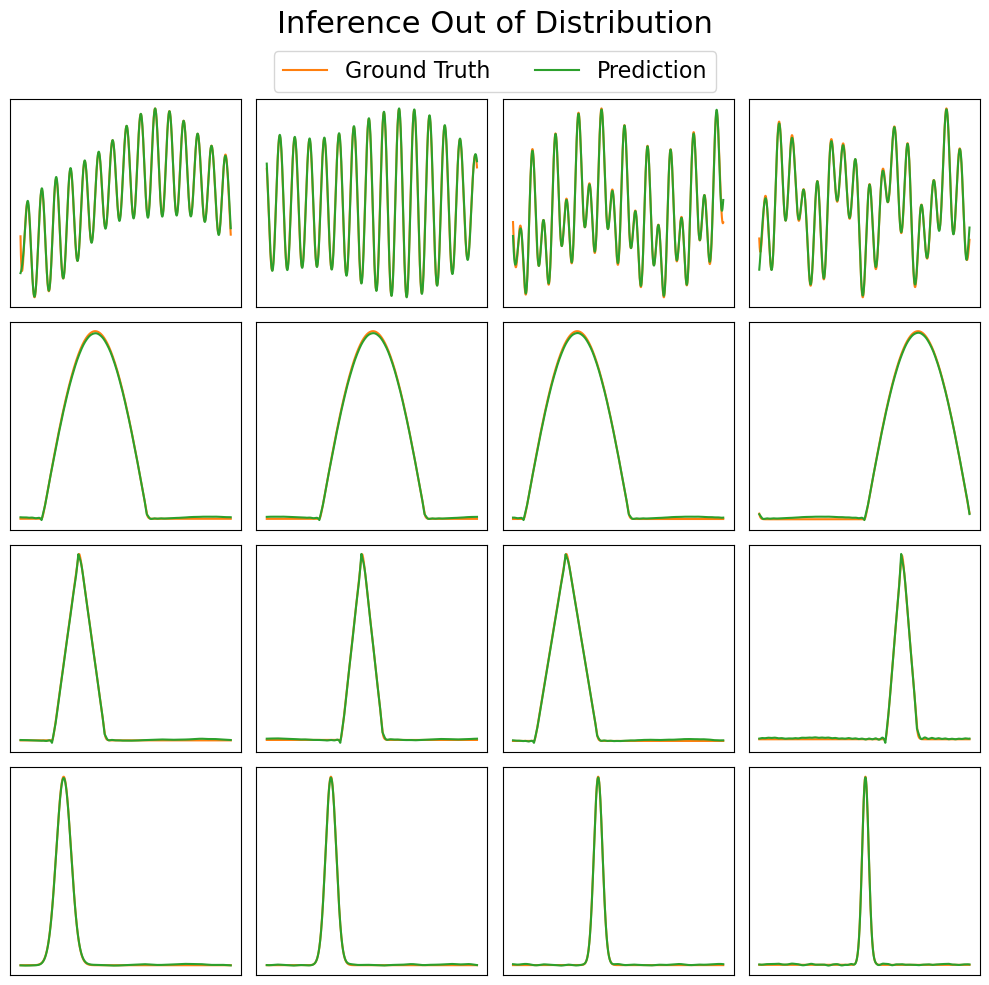

In [11]:
plot_results(first_fno, out_of_dist_x, out_of_dist_y, name = "Inference Out of Distribution");

In [ ]:
interactive_sampling_plot(
    first_fno,
    train_x, train_y,
    test_x, test_y,
    out_of_dist_x, out_of_dist_y,
    training_resolution = 4,
    modes = 32
)

interactive(children=(Dropdown(description='Tab:', index=2, options=('Train', 'Test', 'OOD'), value='OOD'), In…

## Effect of Modes, Width, and Number of Blocks on Final Model 

In [ ]:
interactive_training_ui(train_loader,
    train_x, train_y,
    test_x, test_y,
    out_of_dist_x, out_of_dist_y
)
